### This Jupyter Notebook shows how to load the Twitter data into a dataframe

Useful links

* Introduction to Jupyter Notebooks: [Jupyter Notebook Tutorial: Introduction, Setup, and Walkthrough](https://www.youtube.com/watch?v=HW29067qVWk)
* Getting started with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html
* Getting started with natural language processing (NLP) with NLTK https://www.nltk.org/book/

In [1]:
import os
import json
import re
import nltk
import numpy as np
import pandas as pd
import random
from collections import Counter
from nltk.stem.porter import PorterStemmer
from pprint import pprint
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.text import Text
from wordcloud import WordCloud
from nltk.util import ngrams
from itertools import combinations 
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Search terms for the corpus: 
Fake news
Propaganda
Disinformation
Active measures
Subversion
Interference
Influence
Conspiracy
Deep state
Misinformation
Fabrication
Manipulate
Deceive
Useful idiots
Mainstream media
Populism
Untrustworthy
Hoax
Made-up
Bogus
Inaccurate
Doctored
Fact Checking
eu False
eu Fraud
eu Hoax
eu Lies
eu Rumours
eu Troll
europe False
europe Fraud
europe Hoax
europe Lies
europe Rumours
europe Troll
european False
european Fraud
european Hoax
european Lies
european Rumours
european Troll 

In [2]:
df = pd.read_pickle(r"C:\Users\Brands\Documents\Cardiff\Dissertation work\Data_analysis\Data\May_2021\climate_df_May21.pkl")

In [3]:
df.head(100)

,tweet_id,hashtags,tweet_text,is_reply,is_retweet,user_name,created
156,1388644153093988352,[],"addressing climate change and health inequities are among president biden's top priorities. but decades of underfunding, political interference and race and gender bias have undercut trust among many government scientists. https://t.co/cwtuefylji",None,False,WPR,Sat May 01 23:59:00 +0000 2021
1043,1388642712837107713,[],@adeadepitan @yardleyshooting @bbc @gretathunberg i pay for the license. you don’t understand you are accountable. this was #climatechange #propaganda for the #bbc. i’ve noted that greta was bbc1 and your program was relegated to bbc2. how do you feel about that? especially as you are a journalist and she isn’t.,AdeAdepitan,False,philip_esq,Sat May 01 23:53:17 +0000 2021
1384,1388642143703486466,[],@cnn what climate ‘crisis’ ....fake news. it’s a natural part of the planet to heat and cool. why was greenland ice free during viking times many centuries ago??,CNN,False,tonez76824832,Sat May 01 23:51:01 +0000 2021
1521,1388641919350177792,[ClimateChange],rt @sdinpraxis: australia's murdoch media continues to spread disinformation on #climatechange https://t.co/yvq6il3vsd,None,False,CharlizeTheroff,Sat May 01 23:50:07 +0000 2021
1743,1388641509851865088,[ClimateChange],rt @sdinpraxis: australia's murdoch media continues to spread disinformation on #climatechange,None,False,FryGerard,Sat May 01 23:48:30 +0000 2021
3103,1388639202372427778,[],@narvuntien @stormsignalsa @canadianworker2 @wayneallanh @rijpew @thedisproof @b_bolshevik100 @0sundance @sander_1954 @halbrow68884227 @arthurbraby @climatehope2 @ingersolrobert @guygadboisguyg1 @rln_nelson @circular_logic_ @bridgetholmstro @tintincognito @troycramp69 @no2wind @barbarajdurkin @ruth91869132 @dlmtd2 @robmeekel @tcaddy5 @jinxnohi @iandjbrown2 @fishyfish67 @mentalmal1 @roypentland @cole44749821 @ibergwiesel @medbennett @jasonpaisley @rob46401650 @knah22 @d_e_mol @ucbearcat90 @hadleyjohn @affitthro @geraldkutney @dawntj90 @sapienthetero @hfjohnsen @nooil4pacifists @dodgydingo1 @cjtjgeol @quixotesdonkey @alan_poirier @pacleanwater .\nsome real world experience would be good for your mental development though.\n\nbut you prefer to spew bs propaganda from your basement instead 🤦🤦🤦,Narvuntien,False,MikeDel21893959,Sat May 01 23:39:20 +0000 2021
3600,1388638387872026625,[],@comradeyurika lol i also remember that he used to do posts like “get a load of these dumb climate change deniers” and then eventually got to “climate change is a cultural marxist conspiracy theory”. the ants in his apartment have seeped into his brain.,ComradeYurika,False,BristleBris,Sat May 01 23:36:05 +0000 2021
4144,1388637510759292930,[],poverty for all...\n\nin the wake of fake covid data and fake climate data...\n\nthey both use the same playbook...\n\nlazy people cant be bothered to check history &amp; facts..\n\nit's what media propaganda thrives on https://t.co/cteyiolkct,None,False,fergy1999,Sat May 01 23:32:36 +0000 2021
5056,1388636038281707521,[],rt @montaga: project veritas exposed @cnn for lies &amp; propaganda against trump &amp; his supporters as well as covid &amp; climate change &amp; no one…,None,False,laurenann371,Sat May 01 23:26:45 +0000 2021
6204,1388634095400497154,"[GlobalWarmingHoax, Disinformation]",rt @indianajoe777: so right now -- the arctic sea ice extent is the same as when aoc was born. #globalwarminghoax \n#disinformation #politic…,None,False,climate_fact,Sat May 01 23:19:02 +0000 2021


# Number of tweets

In [4]:
print(f"{len(df)} texts loaded.")

301631 texts loaded.


In [5]:
hashtags = []
for tag in df.hashtags:
    if tag != []:
        hashtags.extend(tag)
        

counts = Counter(hashtags)
pprint(counts)

Counter({'ClimateChange': 4264,
         'climate': 3572,
         'ClimateAction': 2925,
         'climatechange': 2694,
         'ClimateCrisis': 2570,
         'ClimateBrawl': 1758,
         'Facebook': 1347,
         'disinformation': 1214,
         'COVID19': 1200,
         'misinformation': 1098,
         'propaganda': 863,
         'EUCO': 852,
         'ClimateEmergency': 777,
         'Climate': 746,
         'Murdoch': 681,
         'Exxon': 674,
         'Science': 459,
         'climatebrawl': 453,
         'ProjectVeritas': 438,
         'paranormal': 399,
         'Propaganda': 372,
         'Bitcoin': 372,
         'Disinformation': 337,
         'FakeNews': 336,
         'NewClimateWar': 330,
         'GlobalWarming': 329,
         'climatedenial': 313,
         'Fear': 300,
         'Misinformation': 297,
         'Coastal': 278,
         'BigOil': 276,
         'ClimateDenial': 273,
         'COP26': 268,
         'Covid_19': 254,
         'ClimateJustice': 248,
     

In [6]:
for tag in counts:
    if 'climate' in tag.lower():
        print(tag)    
    elif 'earth' in tag.lower():
        print(tag)
    elif 'globe'in tag.lower():
        print(tag)
    elif 'global' in tag.lower():
        print(tag)

ClimateChange
GlobalWarmingHoax
ClimateEmergency
climatebrawl
ClimateScam
ClimateCrisis
climatechange
ActOnClimate
GlobalWarming
climate
ClimateJustice
ClimateAction
Climate
globalneocieplenie
ClimateBrawl
EarthDay
ClimateChangeBS
GlobalWarmingBS
ClimateEnvoy
ClimateChangeUS
FAOClimate
SEIClimate
ClimateNPS
climatechnage
ClimateSafeStreets
ClimateLiteracy
MediaClimateLies
ClimateAccountability
globalwarming
climatecrisis
CoveringClimateNow
climatedeniers
Globalization
climategate
ClimateEngineering
Climatechange
climateaction
climateemergency
Globalism
FaceTheClimateEmergency
climatescam
CLIMATECHANGE
ClimateScience
ClimateDerangementSyndrome
ClimateHoax
CLIMATETWITTER
AnthropogenicGlobalWarming
NewClimateWar
ClimateCatastropheCult
ClimateScamBS
ClimateDenial
climatedenial
climatemisinformation
ClimateAlarmists
ClimateCultBS
climateclowns
ClimateEmergencyCult
climatecriminals
climategrief
badclimate
ClimateAndEcologicalEmergency
ClimateAlarmist
TheNewClimateWar
CLIMATE
ClimateBreakdown

In [7]:
# for index, row in df.iterrows():
#     if '#climatecrisis' in row.tweet_text:
#         print(row.tweet_text)

# Top users

In [8]:
df.user_name.value_counts()

stopfundingheat    2042
H11Life            1939
SustainTrends      1832
Veritatem2021      1589
hassciencebot      1341
Canadianworker2    1135
MikeDel21893959     888
GeraldKutney        872
deikalien           745
Narvuntien          631
DickMackintosh      613
Ceist8              606
Robert76907841      591
FChecker76          573
_Ratzz_             569
donahugh216         567
Andrewemcameron     545
JFSebastian146      540
OscarsWild1         512
MaviUfo             496
FakeTrumpBot1       494
EDavidAn            481
Tcaddy5             471
glinch72            453
TheDisproof         447
collectables66      412
drochir_thonnuk     404
SDinPraxis          404
TWTThisIsNow        393
tan123              388
HalBrow68884227     387
WayneAllanH         372
SniemN              366
MichaelEMann        343
TyotoRiffle         340
MarkCranfield_      332
redmayne_robert     314
PRCA_UK             309
hardtimehardta1     304
TrevorDKidd1        299
CarolinaFaith2      280
MartinBrampton  

# Searching in tweets

# Replies in climate

In [9]:
replies = df.is_reply.notnull().sum()
percent_reply = round(replies / len(df), 2)
percent_reply
print(len(df) - replies)
df.is_reply.notnull().sum()

192962


108669

In [10]:
# 0.42% of the tweets were climate tweets from callout dataset
round(301_631/136_265_329 * 100,2)

0.22

# Unique tweets

In [11]:
climate_set = set(df.tweet_text)
print(len(climate_set), "Unique Tweets")

11168 Unique Tweets


# Bag of words: Climate change

In [7]:
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = " ".join([normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized])
    return normalized


In [13]:
ps = PorterStemmer()
tweets = df.tweet_text


#adding personal stopwords for this dataset
stop_words = stopwords.words('english')
newStopWords = ['RT','I','T','S','U','http','co','s','n','u','p','amp','rt']
stop_words.extend(newStopWords)

# join the list to preprocess
climate_strings = ' '.join(tweets)

# Removing usernames
climate_strings = re.sub(r'@([A-Za-z0-9_]+)','', climate_strings)

climate_split = climate_strings.split(" ")
climate_split = [word for word in climate_split if not word in stop_words]
print(climate_split[0:10])

['addressing', 'climate', 'change', 'health', 'inequities', 'among', 'president', "biden's", 'top', 'priorities.']


In [14]:
climate_split = [word for word in climate_split if not word in stop_words]

In [15]:
print(climate_split[0:10])

['addressing', 'climate', 'change', 'health', 'inequities', 'among', 'president', "biden's", 'top', 'priorities.']


In [16]:
processed_climate = preprocess_text(" ".join(climate_split))


processed_climate = [word for word in processed_climate.split(" ") if not word in stop_words]

bow_climate = Counter(processed_climate)

In [17]:
pprint(bow_climate.most_common(20))

[('climate', 246396),
 ('propaganda', 109726),
 ('change', 82195),
 ('misinformation', 44380),
 ('conspiracy', 43796),
 ('country', 32511),
 ('false', 32310),
 ('free', 31861),
 ('racial', 31739),
 ('social', 31712),
 ('cult', 30943),
 ('wake', 30756),
 ('justice', 30428),
 ('god', 30210),
 ('religious', 29368),
 ('bow', 29086),
 ('disinformation', 28291),
 ('like', 27996),
 ('news', 25083),
 ('fake', 22988)]


# WordCloud

In [18]:
# wordcloud = WordCloud(width = 1000, height = 500,).generate(" ".join(processed_climate))
# wordcloud.to_file("word_cloud_May_21.png")

# Count retweets

In [19]:
# Count retweets

retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        retweets.append(retweet)
        

print(len(retweets))

132983


# Ngrams: Climate

In [20]:
# print(processed_climate)

In [21]:
n = 1

unigrams = ngrams(processed_climate, n)

ngrams_climate = Counter(unigrams)
ngrams_climate.most_common(10)


[(('climate',), 246396),
 (('propaganda',), 109726),
 (('change',), 82195),
 (('misinformation',), 44380),
 (('conspiracy',), 43796),
 (('country',), 32511),
 (('false',), 32310),
 (('free',), 31861),
 (('racial',), 31739),
 (('social',), 31712)]

# Hashtag co-occurence


In [3]:
regex = r"(?<!RT\s)#\w+"

hashtag_list = []
for index, row in df.iterrows():
        htags = re.findall(regex, row.tweet_text.lower())
        hashtag_list.append(htags)


In [4]:
hashtag_ref = [i for i in hashtag_list if i != [] and len(i) > 1]
hashtag_ref

[['#climatechange', '#propaganda', '#bbc'],
 ['#globalwarminghoax', '#disinformation', '#politic'],
 ['#globalwarminghoax',
  '#disinformation',
  '#politicizedscience',
  '#scientismcult'],
 ['#diverse',
  '#governmentscientists',
  '#climatechange',
  '#race',
  '#gender',
  '#bias',
  '#climatescience',
  '#climatepolicy',
  '#diversity',
  '#empowerment'],
 ['#auspol', '#insiders'],
 ['#fossilfuel',
  '#climatecrisis',
  '#climatechange',
  '#actonclimate',
  '#oil',
  '#globalwarming'],
 ['#legalizedlying',
  '#globalwarming',
  '#flubug',
  '#covid',
  '#covid19',
  '#itsahoax',
  '#allofit',
  '#hr5181'],
 ['#patents', '#climate', '#epo', '#greenwashing'],
 ['#jairbolsonaro', '#populism'],
 ['#blm',
  '#women',
  '#aapi',
  '#bipoc',
  '#blacklivesmatter',
  '#womenwhocode',
  '#climateaction',
  '#biden',
  '#minorityrule',
  '#gqp',
  '#responsibility',
  '#voters',
  '#payitforward',
  '#gop',
  '#lies',
  '#foxnews',
  '#news',
  '#covid19',
  '#godislove',
  '#elections',
 

In [21]:
# # creating unique list 
# htag_over1 = [x for x in hashtag_list if len(x) > 1]

# uni_htags_1 = set([])

# for x in htag_over1:
#     for y in x:
#         uni_htags_1.add(y)
        
# uni_htags_1 = list(uni_htags_1)
# uni_htags_1

['#fuckthemedia',
 '#dam',
 '#foundonpixstory',
 '#climateactionnow',
 '#cli',
 '#inverno',
 '#construction',
 '#cancelbillionaires',
 '#facistbook',
 '#elonmusk',
 '#economy',
 '#operationmockingbird',
 '#waterpolicy',
 '#speciesextinction',
 '#nazisraus',
 '#release_political_prisoners',
 '#phraseology',
 '#michigan',
 '#criticalthinking',
 '#messiahfromtheshire',
 '#stopfundingfossils',
 '#projectveritas',
 '#reforestation',
 '#stopfossilfuels',
 '#emf',
 '#klimaatsverandering',
 '#nasa',
 '#sciadvice',
 '#unacceptablerisk',
 '#ghiacciomarino',
 '#co2',
 '#citizensunited',
 '#vincenzoep20',
 '#kidsincages',
 '#bashir',
 '#based',
 '#covid_19',
 '#twgtpodcast',
 '#dimlnp',
 '#hydrocarbons',
 '#statisticalcompetition',
 '#amazon',
 '#diverse',
 '#climatechangedenial',
 '#ccp',
 '#luntz',
 '#twitter',
 '#regulationsprotectus',
 '#klimakrise',
 '#power',
 '#ecoci',
 '#timemagazine',
 '#increase',
 '#qanda',
 '#googleio',
 '#eiffageroute',
 '#covididiots',
 '#systemicracism',
 '#batshit'

In [7]:
uni_htags_1 = ['#climatechange', '#climatecrisis',
'#covid19', '#euco',
'#climate', '#covid19',
'#climate', '#euco',
'#climatechange', '#propaganda',
'#climatebrawl', '#climatecrisis',
'#climateaction', '#climatecrisis',
'#climatechange', '#disinformation',
'#climatebrawl', '#climatechange',
'#climatedenial', '#misinformation',
'#climatechange', '#globalwarming',
'#climatechange', '#covid19',
'#climate', '#misinformation',
'#climatechange', '#fakenews',
'#climatecrisis', '#propaganda',
'#climatechange', '#paranormal',
'#climatecrisis', '#disinformation',
'#climatecrisis', '#climateemergency',
'#climatechange', '#exxon',
'#globalwarming', '#propaganda',
'#climatechange', '#projectveritas',
'#climateaction', '#covid19',
'#climatecrisis', '#misinformation',
'#climatechange', '#fear',
'#fakenews', '#fear',
'#fakenews', '#projectveritas',
'#fear', '#projectveritas',
'#climateaction', '#climatechange',
'#denialmachine', '#disinformation',
'#climateaction', '#propaganda',
'#climatecrisis', '#globalwarming',
'#climatechange', '#coastal',
'#climateaction', '#renewableenergy',
'#climate', '#propaganda',
'#climatecrisis', '#denialmachine',
'#auspol', '#climatechange',
'#climateaction', '#colonialpipeline',
'#colonialpipeline', '#renewableenergy',
'#disinformation', '#misinformation',
'#climatechange', '#itv',
'#climateaction', '#climateemergency',
'#climatechange', '#covid_19',
'#covid19', '#disinformation',
'#climate', '#disinformation',
'#covid_19', '#itv',
'#beek', '#pesticides',
'#auspol', '#propaganda',
'#bcpoli', '#cdnpoli',
'#climateaction', '#disinformation',
'#climateaction', '#misinformation']

uni_htags_1 = list(set(uni_htags_1))
print(uni_htags_1)

['#renewableenergy', '#coastal', '#climatedenial', '#pesticides', '#climate', '#climateemergency', '#climatecrisis', '#itv', '#bcpoli', '#globalwarming', '#projectveritas', '#fakenews', '#fear', '#misinformation', '#disinformation', '#covid19', '#paranormal', '#climatechange', '#beek', '#denialmachine', '#climatebrawl', '#colonialpipeline', '#covid_19', '#cdnpoli', '#exxon', '#euco', '#propaganda', '#auspol', '#climateaction']


In [8]:
# creating matrix of zeros for co-occurence

matrix1 = np.zeros((len(uni_htags_1), len(uni_htags_1)))

htag_to_id1 = {uni_htags_1[i]:i for i in range(len(uni_htags_1))}

In [9]:
# # filling matrix with data

for _ in hashtag_ref:
        hashtags_id1 = [htag_to_id1[x] for x in _ if x in uni_htags_1]
        for h in hashtags_id1:
            for o in hashtags_id1:
                if h != o:
                    matrix1[h, o] += 1


In [10]:
sns.set(rc={'figure.figsize':(46,36)})
sns.set(font_scale = 3)
heatmap_df2 = pd.DataFrame(data=matrix1, columns=uni_htags_1, index=uni_htags_1)

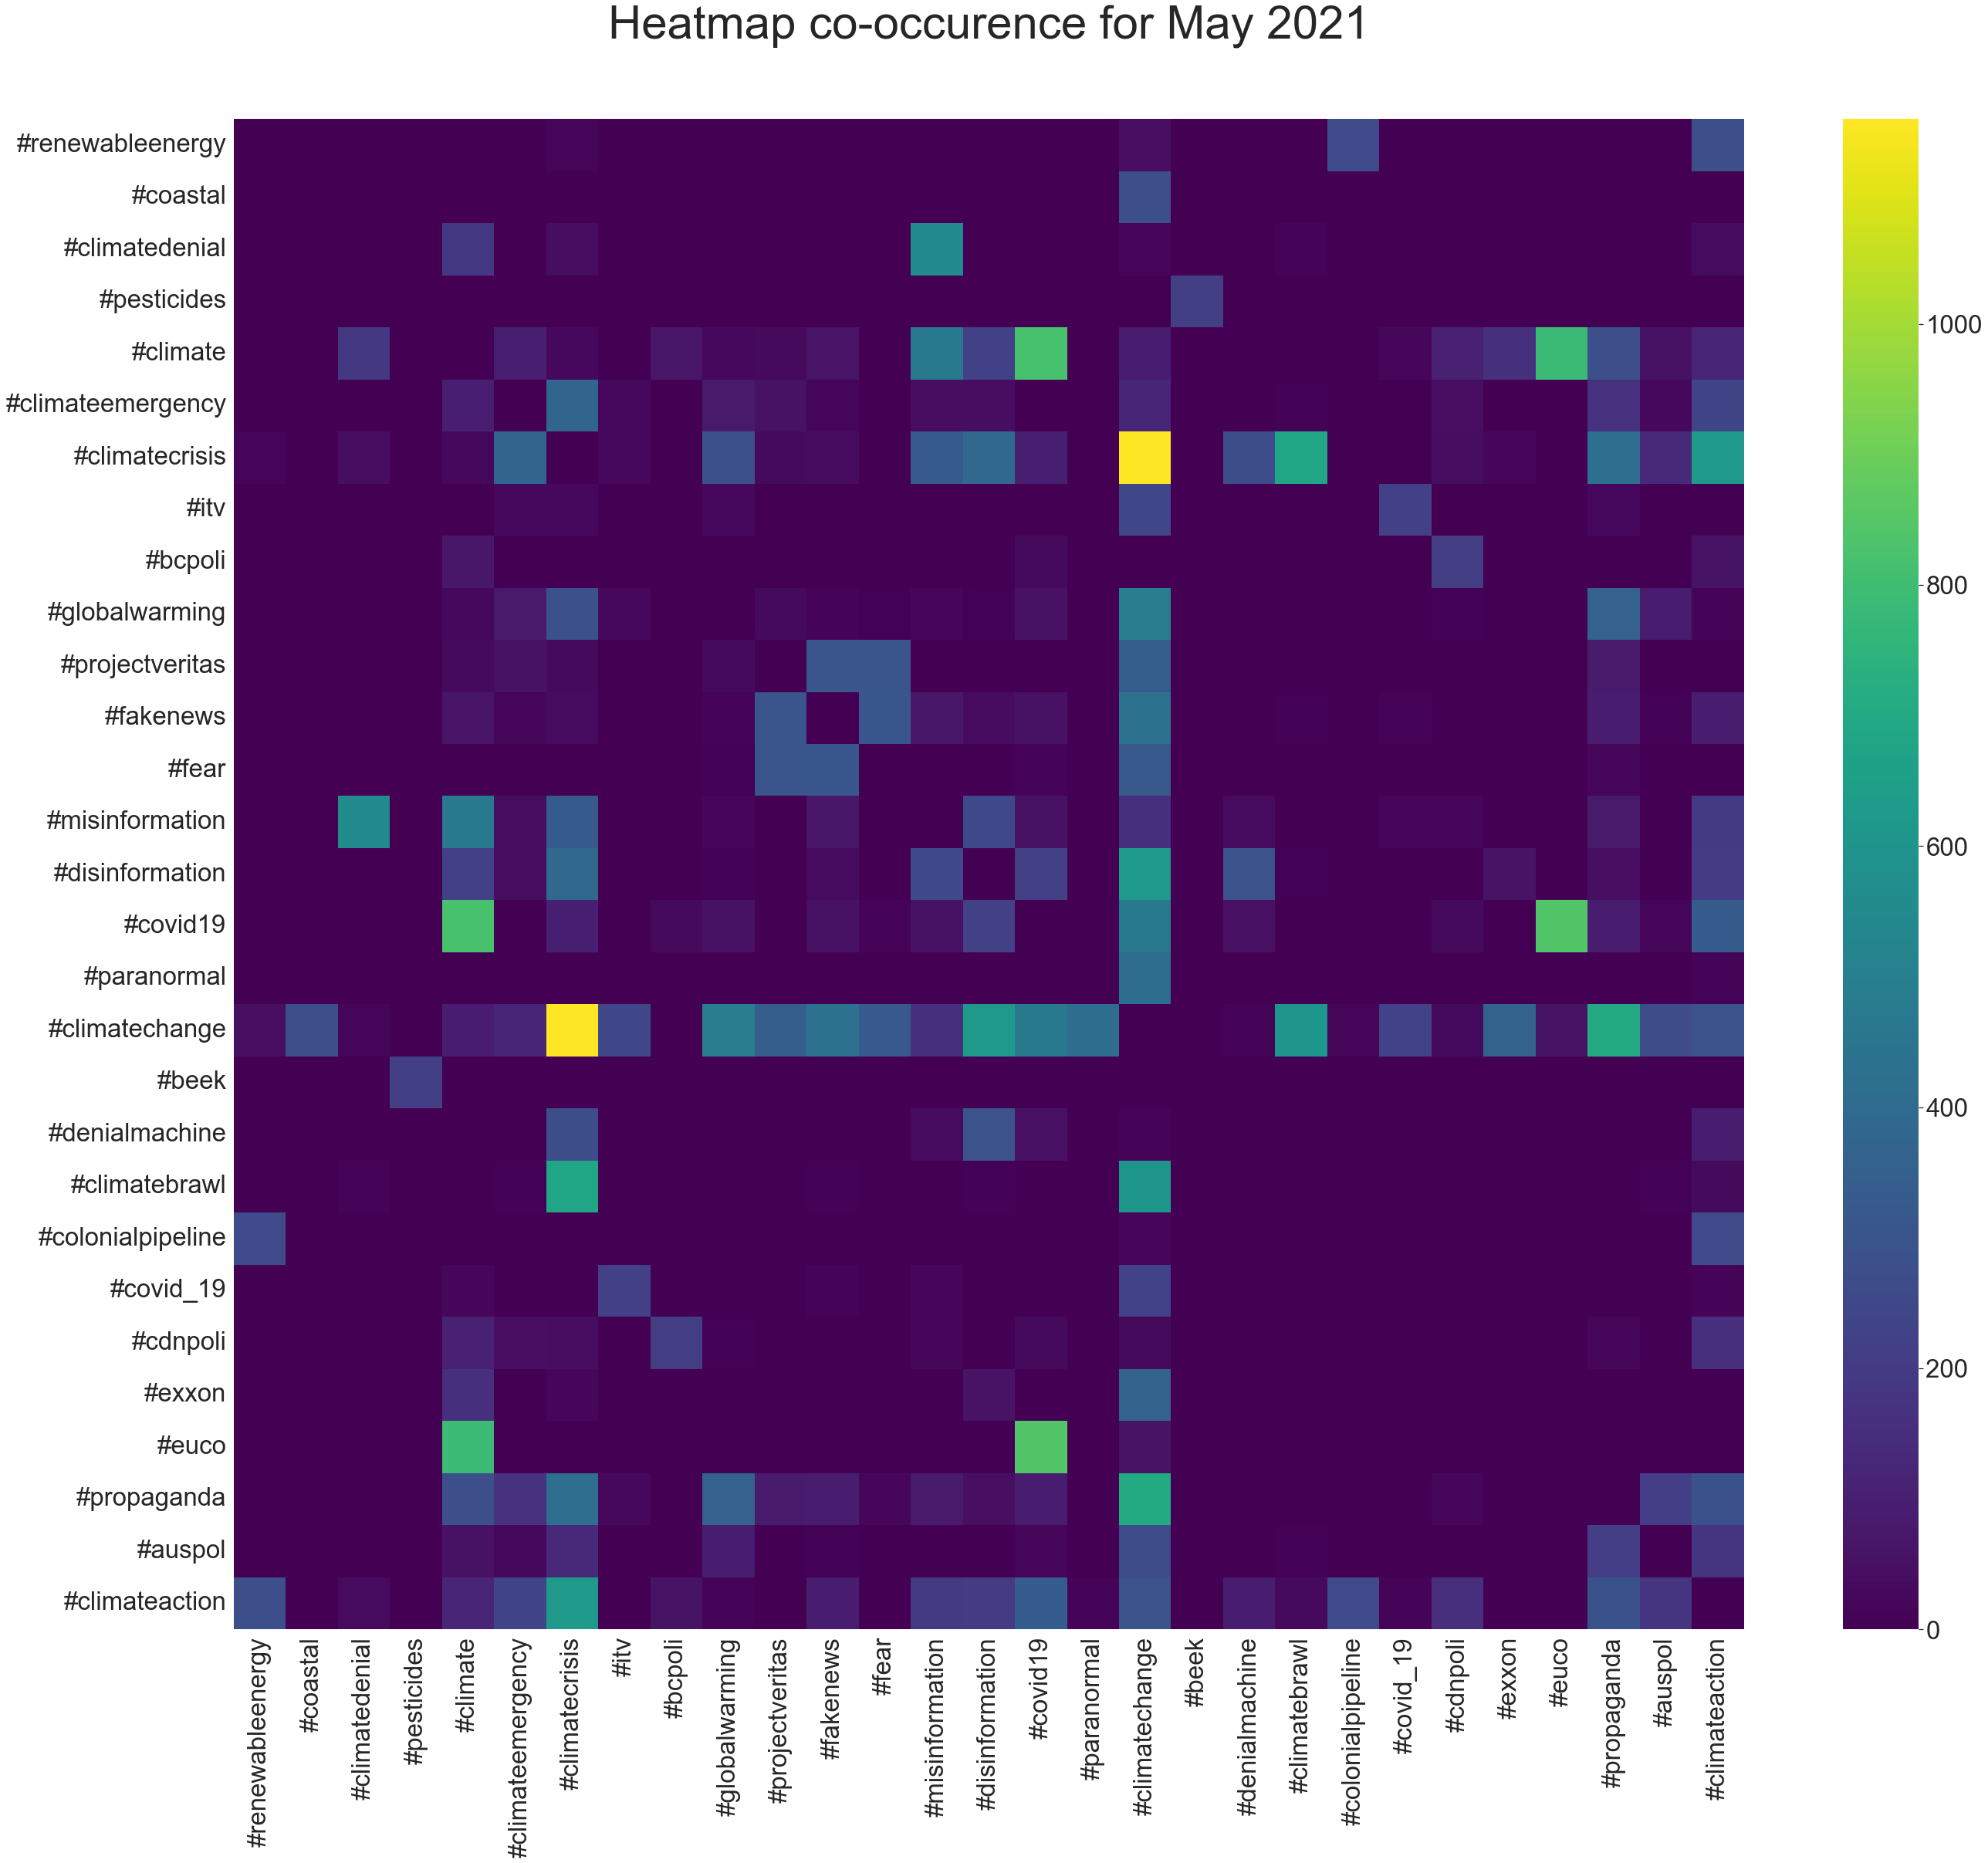

In [12]:
sns.heatmap(heatmap_df2, square=True, cmap='viridis')
plt.title("Heatmap co-occurence for May 2021", fontdict= {'fontsize': 60}, y=1.05)
plt.savefig("htags_climate_May21.png")

In [6]:
counter = Counter()

for tag in hashtag_list:
    tag.sort()
    combos = list(combinations(tag, r=2))
    counter.update(combos)


counter.most_common(50)

[(('#climatechange', '#climatecrisis'), 1157),
 (('#covid19', '#euco'), 844),
 (('#climate', '#covid19'), 822),
 (('#climate', '#euco'), 788),
 (('#climatechange', '#propaganda'), 701),
 (('#climatebrawl', '#climatecrisis'), 684),
 (('#climateaction', '#climatecrisis'), 628),
 (('#climatechange', '#disinformation'), 626),
 (('#climatebrawl', '#climatechange'), 609),
 (('#climatedenial', '#misinformation'), 552),
 (('#climatechange', '#globalwarming'), 487),
 (('#climatechange', '#covid19'), 469),
 (('#climate', '#misinformation'), 468),
 (('#climatechange', '#fakenews'), 437),
 (('#climatecrisis', '#propaganda'), 412),
 (('#climatechange', '#paranormal'), 411),
 (('#climatecrisis', '#disinformation'), 385),
 (('#climatecrisis', '#climateemergency'), 372),
 (('#climatechange', '#exxon'), 361),
 (('#globalwarming', '#propaganda'), 353),
 (('#climatechange', '#projectveritas'), 339),
 (('#climateaction', '#covid19'), 333),
 (('#climatecrisis', '#misinformation'), 322),
 (('#climatechange'

<AxesSubplot:>

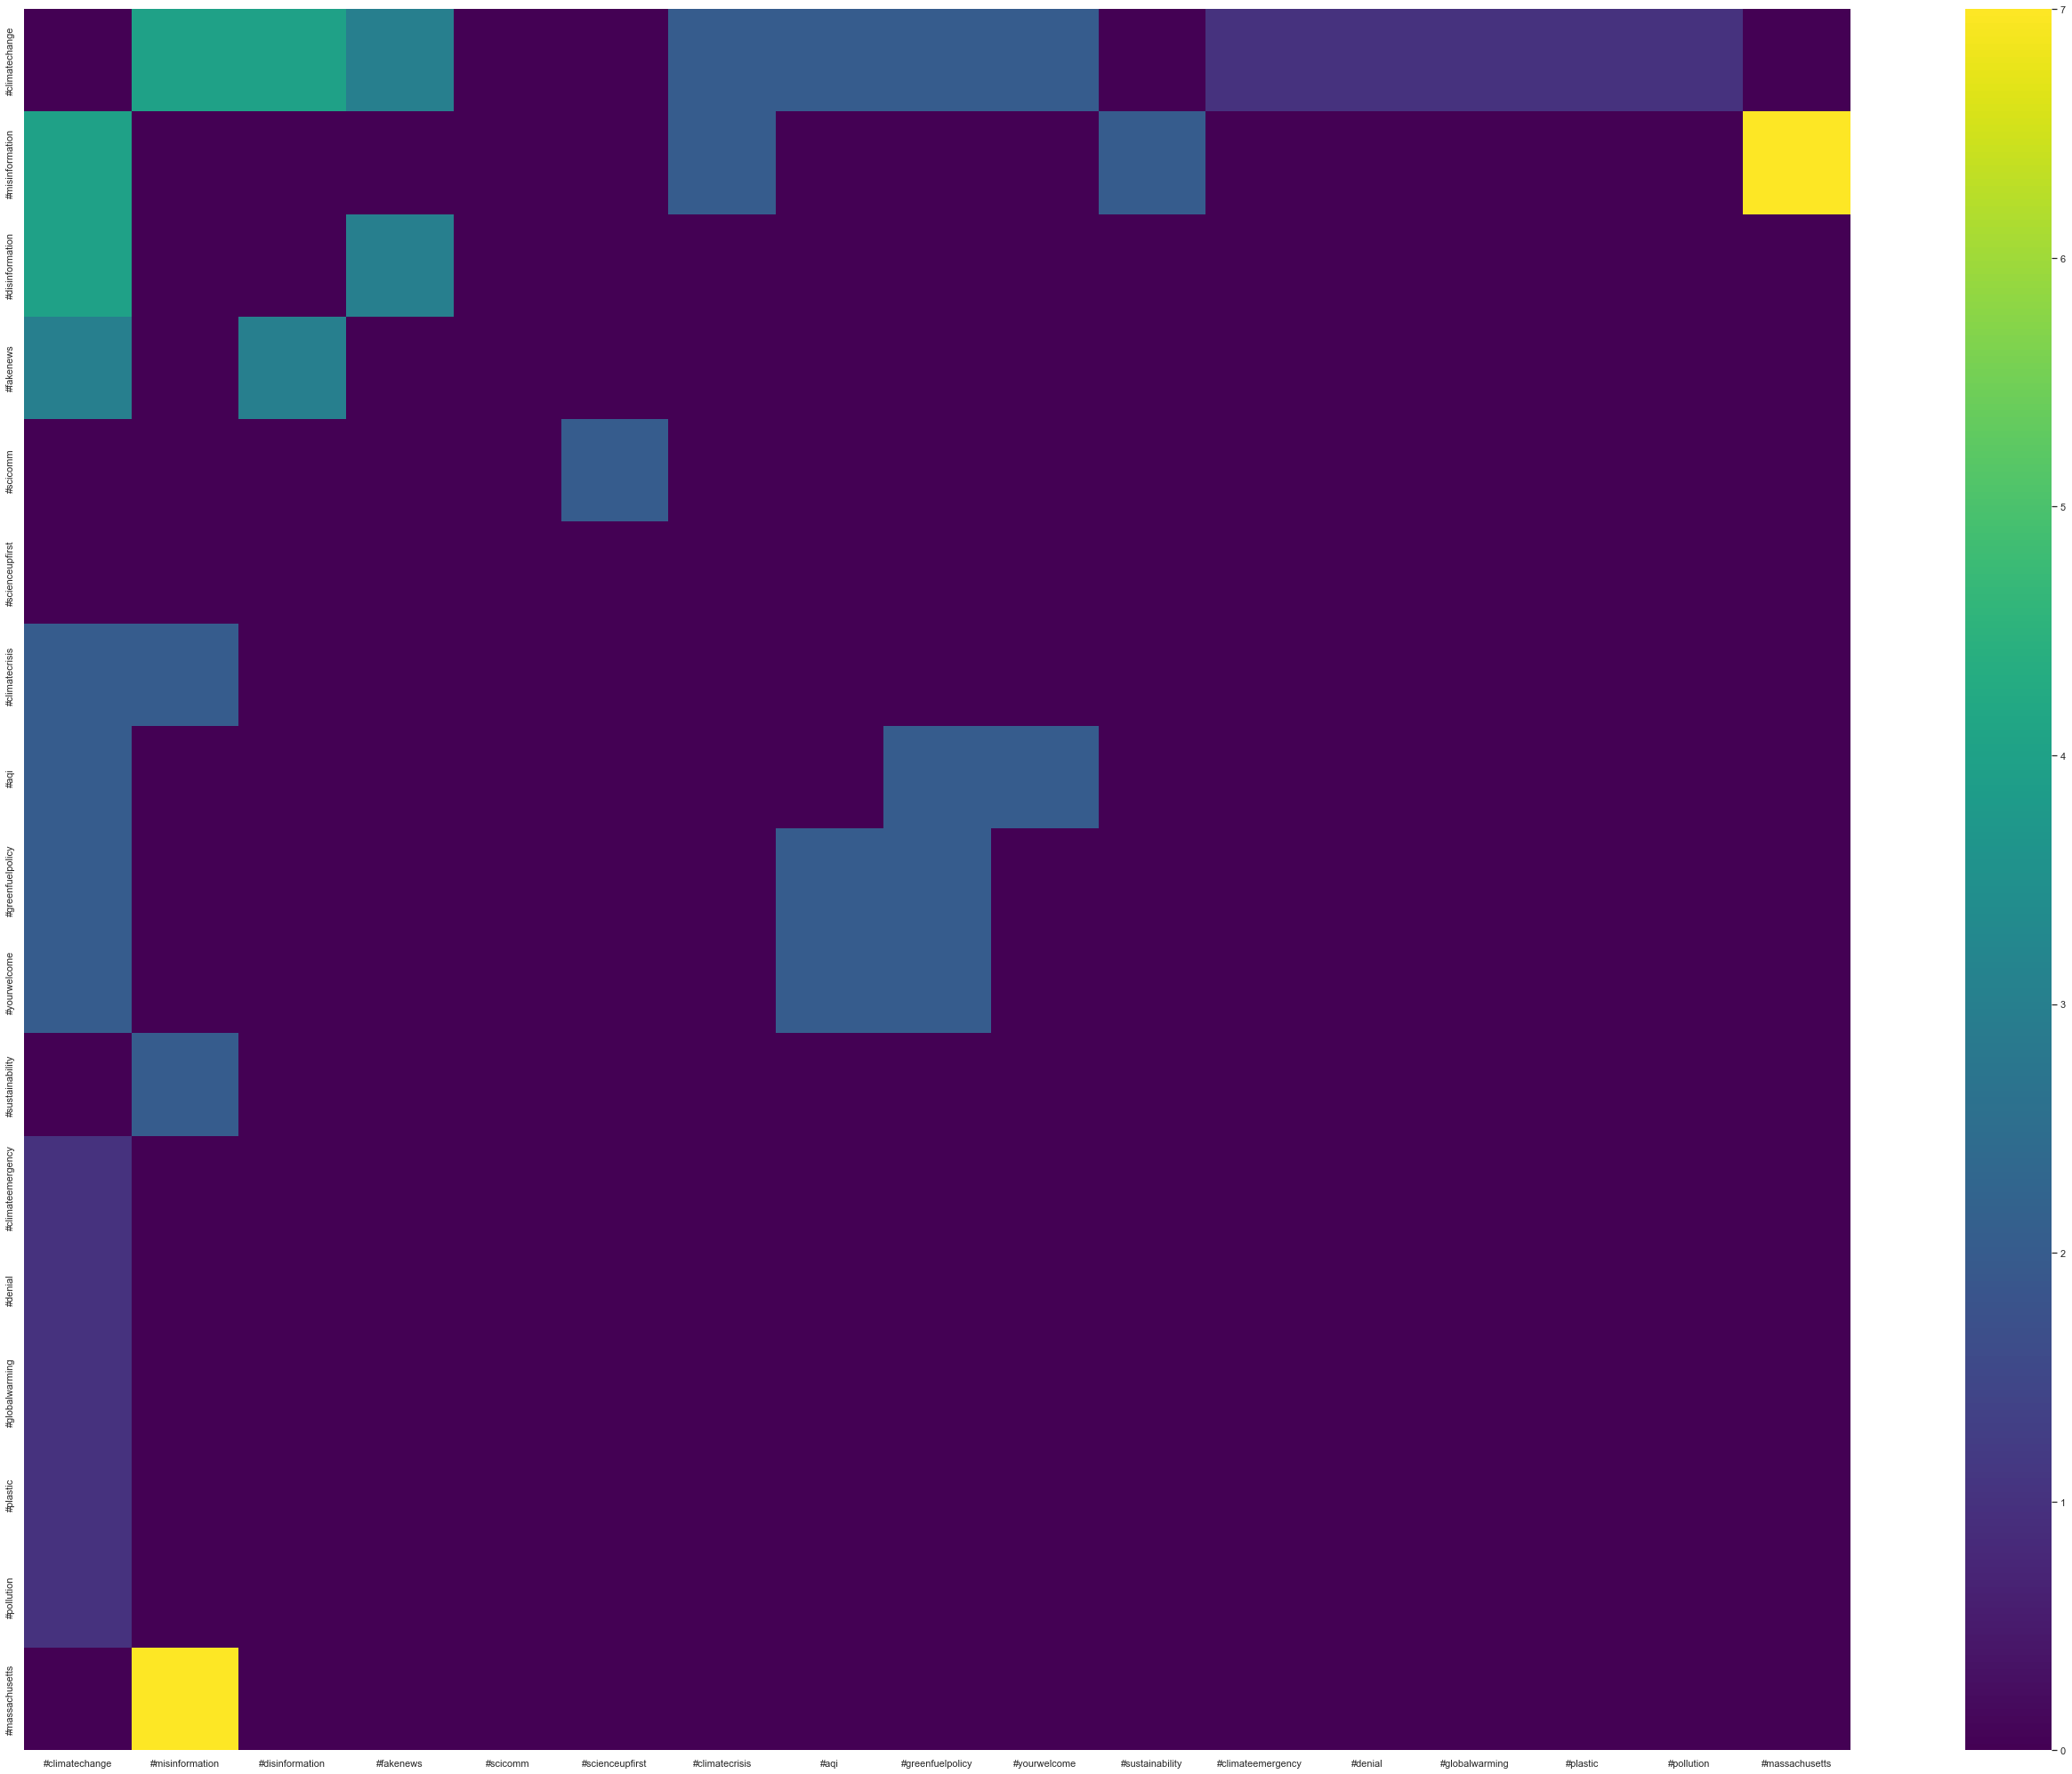

In [94]:
# heatmap_df = pd.DataFrame(data=htag_keys, columns=htag_co, index=htag_co)
# sns.heatmap(heatmap_df, square=False, cmap='viridis')

# Most common hashtags

In [23]:
hashtags_refined = []
for _ in hashtag_list:
    if _ != []:
        hashtags_refined.extend(_)

count_htags = Counter(hashtags_refined)

# uni_htags = list(set(hashtags_refined))
# uni_htags

count_htags.most_common(10)

[('#climatechange', 9880),
 ('#climate', 6496),
 ('#climatecrisis', 5556),
 ('#climateaction', 4942),
 ('#propaganda', 3039),
 ('#climatebrawl', 3008),
 ('#disinformation', 2086),
 ('#covid19', 2015),
 ('#climateemergency', 1876),
 ('#misinformation', 1807)]

# Concordance

In [52]:
print(climate_strings[0:10000])

 fake news, bud. numbers are declining, size of fires are declining. the only thing that is rising is the blood pressure of climate alarmists who aren’t getting what they want. https://t.co/uk4dset5yi has those crazy climate scientists superceded poopy fake news too far?  hey, peter! we are too educated to fall for the  weekly propaganda pictures. do some real good and focus on what ontarians and your constituents really care about: health, education, climate change, and most importantly social programmes, #not beer #ridiculouspccon  hey, dave! we are too educated to fall for the  weekly propaganda pictures. do some real good and focus on what ontarians and your constituents really care about: health, education, climate change, and most importantly social programmes, #not beer #ridiculouspccon rt : it’s also important to distinct this from the right-wing “fema camp” conspiracy, in that:
1. climate breakdown is actual… rt : this is weird conspiracy theory prepper bullshit. this is a sob

In [61]:
text = Text(climate_strings.split(" "))
concord_climate = text.concordance("climate", width=150, lines=50)

Displaying 50 of 186111 matches:
rt : a common trick used in climate propaganda is to use very bigly numbers and keep biggering and biggeri
 bogus bail charge.
the uk's national security state wants to induce a climate of fear, destroy…  lol!  you are so funny, too bad most of us know the
of fear, destroy…  lol!  you are so funny, too bad most of us know the climate action act was deep state and luciferian! rt :  anti-climate change pr
da,   is telling people the world is going to end in 12 yrs because of climate change. rt : bbc and attenborough accused of fake news misinformation 
he facts’
https://t.co/vsrrjreik0  this is fake news. you are peddling climate outrage. rt : assange sentenced 50 weeks for bogus bail charge.
the uk
 bogus bail charge.
the uk's national security state wants to induce a climate of fear, destroy…  do you think that there will be a point in the futu
ace criminal charges for intentionally misleading to prevent action on climate change? i mean at a point where

# Random tweets


In [59]:
sample = df.sample(n=10)
pprint(sample.tweet_text)

64899091    rt @pokershash: modi’s\n\n15 lakh: never promised\n2 crore job: false, never promised\nclimate not changed: clipped, false propaganda\n\nrahul’s…
50598383         rt @ecosensenow: the “climate crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho…
3622513         rt @sankrant: fake news. world over in hot tropical climates native women were often bare chested,\nas men were. western women’s “bra-burnin…
61405454         rt @ecosensenow: the “climate crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho…
51885812         rt @khayhoe: usgs director reilly, a former astronaut and petroleum geologist, claims the national climate assessment used "inaccurate mode…
25214999                                                  people who call climate change "liberal propaganda" are the same people who think the earth is flat
50715721         rt @ecosensenow: the “climate crisi

In [105]:
for index, row in df.iterrows():
    if "#massachusetts" in row.tweet_text.lower() and "#misinformation" in row.tweet_text.lower():
        pprint(row.tweet_text)

('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('#Massachusetts is proceeding with a lawsuit against ExxonMobil for spreading '
 '#misinformation about c

# TF-IDF

In [3]:
no_retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        continue
    elif row.is_reply:
        continue
    else:
        no_retweets.append(row.tweet_text)

In [5]:
len(no_retweets)

59979

In [8]:
tfidf_data = [preprocess_text(tweet) for tweet in no_retweets]

In [9]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidf_wm = tfidfvectorizer.fit_transform(tfidf_data)

tfidf_tokens = tfidfvectorizer.get_feature_names()

df_tfidfvect = pd.DataFrame(data = tfidf_wm.todense(),index = range(0,len(tfidf_data)),columns = tfidf_tokens)

In [10]:
tokens_above_threshold = df_tfidfvect.max()[df_tfidfvect.max() > 0.7].sort_values(ascending=False)

In [11]:
tokens_above_threshold

climatescam      0.956016
vishnufno        0.950256
lvfixltz5k       0.943466
heartwarming     0.940708
defundthebbc     0.923312
conspiracy       0.917775
expect           0.892475
surely           0.886787
climatecrisis    0.882737
aaaaaand         0.850264
ban              0.842527
y1nibuzmzt       0.828767
criticise        0.820446
ponder           0.817280
refugee          0.816819
apos             0.812597
clickbait        0.798811
care             0.789210
scam             0.787580
zbmouqiteh       0.787312
5agew8cpiu       0.786096
rn1chopwcz       0.786096
wx8drmmxyq       0.786096
catastrophe      0.780989
vrcwphfbyd       0.779135
hoax             0.778766
jcwzrwmzll       0.767037
cnn              0.766948
alarmism         0.761115
bthnp3u9cc       0.753030
jovk8xohkp       0.750632
aka              0.748218
plan             0.742456
weather          0.740905
yymvfac2ar       0.740850
7w25vjenyn       0.740850
wake             0.739916
chiller          0.739287
dose        